In this lab, we be implementing the trapezoidal rule and Simpson's rule for numerical integration.

#### **Import necessary packages**

In [ ]:
# Write appropriate code
import numpy as np
import matplotlib.pyplot as plt

#### **A. The Trapezoidal Rule**

The trapezoidal rule is a numerical method for approximating the definite integral of a function $f(x)$ over the interval $[a,b]$.

$$I = \int_a^b f(x) dx$$

Using the first order Taylor series expansion of $f(x)$ we can approximate the integral as:

$$
\begin{align*}
I &\approx \int_a^b f_1(x) dx \\
&\approx \int_a^b \left[ f(a) + \frac{f(a)-f(b)}{b-a} (x-a) \right] dx \\
&\approx (b-a) \left[ \frac{f(a)+f(b)}{2} \right]
\end{align*}
$$

where $f_1(x) = f(a) + \frac{f(a)-f(b)}{b-a} (x-a)$ is the first order Taylor series expansion of $f(x)$ at $x=a$.

The trapezoidal rule is equivalent to approximating the area under the straight line connecting the points $(a,f(a))$ and $(b,f(b))$.

<center>
    <img src="../images/trapezoidal_single.png" width="400" />
</center>

We will now implement the trapezoidal rule to approximate the integral of $f(x) = -\frac{1}{5}(x-4)^2 + 8$ over the interval $[-1, 8]$ by following the steps below:

##### **Step 1: Define the function**
Write a function that takes x as an input and returns the value of $f(x)$. Note that the function should be able to handle both scalar and vector inputs.

In [ ]:
# Write appropriate code
def f(x):
    return (-1/5) * (x-4)**2 + 8

##### **Step 2: Define the interval**
Define the interval as a list of two elements, where the first element is the lower bound and the second element is the upper bound. Name the list `interval`.

In [ ]:
# Write appropriate code
interval = np.array([-1, 8])

##### **Step 3: Plot the graph of the function**
In order to visualize the function, and the area under the straight line connecting the points $(a,f(a))$ and $(b,f(b))$, we will plot the following:

* The function $f(x)$ over the interval $[-5, 12]$.
* The straight line connecting the points $(a,f(a))$ and $(b,f(b))$
* The filled area under the straight line connecting the points $(a,f(a))$ and $(b,f(b))$.

To plot the filled area under the straight line connecting the points $(a,f(a))$ and $(b,f(b))$, we will use the `fill_between` function from the `matplotlib.pyplot` package. See the documentation [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.fill_between.html) for more information.



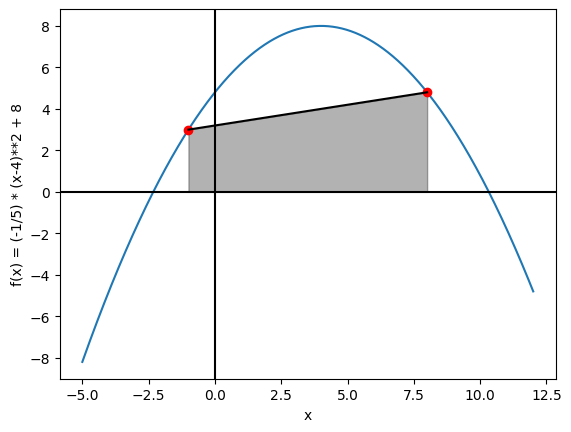

In [ ]:
# Write appropriate code
x = np.linspace(-5, 12, 1000)
y = f(x)

plt.xlabel('x')
plt.ylabel('f(x) = (-1/5) * (x-4)**2 + 8')
plt.plot(x, y)
plt.plot(interval, f(interval), 'ro')
plt.plot(interval, f(interval), 'k-')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.fill_between(interval, f(interval), color='k', alpha=0.3)
plt.show()

##### **Step 4: Define a function to compute the trapezoidal rule**
Write a function named `trapezoidal` that takes the interval as parameters and returns the approximate value of the integral. You have to call the function `f` that you defined in Step 1 to compute the value of $f(a)$ and $f(b)$ and then use the trapezoidal rule to compute the approximate value of the integral. Finally, return the approximate value of the integral.

In [ ]:
# Write appropriate code
def trapezoidal(interval):
    f_a = f(interval[0])
    f_b = f(interval[1])

    rslt = (interval[1] - interval[0]) * (f_a + f_b) / 2
    return rslt

##### **Step 5: Compute the approximate value of the integral**
Call the function `trapezoidal` that you defined in Step 4 and pass the interval as parameters. Store the returned value in a variable named `I`. Print the value of `I`. Calculate the integral analytically and compare the result with the approximate value of the integral. Print the approximate relative error.

In [ ]:
# Write appropriate code
I = trapezoidal(interval)
print('The numerical integration result is: ', I)

I_actual = 59.4
print(f"Relative error: {abs(I_actual - I) / I_actual * 100:.2f}%")

The numerical integration result is:  35.1
Relative error: 40.91%


####

#### **B. The Composite Trapezoidal Rule**

The composite trapezoidal rule is a numerical method for approximating the definite integral of a function $f(x)$ over the interval $[a,b]$ using a partition of the interval into $n$ subintervals of equal length. Using the composite trapezoidal rule, we can reduce the error in the approximation of the integral by increasing the number of subintervals.

<center>
    <img src="../images/trapezoidal_composite.png" width="400" />
</center>

In the composite trapezoidal rule, we approximate the integral in each subinterval using the trapezoidal rule and then sum the approximations to obtain the approximate value of the integral.

$$
\begin{align*}
I &= \int_a^b f(x) dx \\
I &= \int_{x_0}^{x_1} f(x) dx + \int_{x_1}^{x_2} f(x) dx + \cdots + \int_{x_{n-1}}^{x_n} f(x) dx \\
I &\approx h \frac{f(x_0) + f(x_1)}{2} + h \frac{f(x_1) + f(x_2)}{2} + \cdots + h \frac{f(x_{n-1}) + f(x_n)}{2} \\
&= \frac{h}{2} \left[ f(x_0) + 2f(x_1) + 2f(x_2) + \cdots + 2f(x_{n-1}) + f(x_n) \right] \\
&= \frac{h}{2} \left[ f(x_0) + 2\sum_{i=1}^{n-1} f(x_i) + f(x_n) \right] \\
&= (b-a) \frac{f(x_0) + 2\sum_{i=1}^{n-1} f(x_i) + f(x_n)}{2n}
\end{align*}
$$

where $h = \frac{b-a}{n}$ is the length of each subinterval.

We will now implement the composite trapezoidal rule to approximate the integral of $f(x) = -\frac{1}{5}(x-4)^2 + 8$ over the interval $[-1, 8]$ by following the steps below:

##### **Step 1: Define the function**
Write a function that takes x as an parameter and returns the value of $f(x)$. Note that the function should be able to handle both scalar and vector inputs.

In [ ]:
# Write appropriate code
def f(x):
    return (-1/5) * (x-4)**2 + 8

##### **Step 2: Define the interval**
Define the interval as a numpy array of two elements, where the first element is the lower bound and the second element is the upper bound. Name the array `interval`.

In [ ]:
# Write appropriate code
interval = np.array([-1, 8])

##### **Step 3: Define a function to compute the composite trapezoidal rule**
Write a function named `composite_trapezoidal` that takes the interval and the number of subintervals as parameters and returns the approximate value of the integral.
*   Take `n+1` equally spaced points between the lower and upper bounds of the interval. Name the array `x`.
*   Compute the value of $f(x)$ at each point in `x`. Name the array `y`.
*   Compute the approximate value of the integral using the composite trapezoidal rule. Name the variable `I`.
*   Return the approximate value of the integral.

In [ ]:
# Write appropriate code
def composite_trapezoidal(interval, n):
    x = np.linspace(interval[0], interval[1], n+1)
    y = f(x)

    I = (interval[1] - interval[0]) / (2 * n) * (y[0] + y[-1] + 2 * np.sum(y[1:-1]))
    return I

##### **Step 4: Compute the approximate value of the integral**
Call the function `composite_trapezoidal` that you defined in Step 3 and pass the interval and the number of subintervals as parameters. We will take different values of `n` and compare the results.

*   Call the function `composite_trapezoidal` and pass the interval and `n=1` as parameters. Store the returned value in a variable named `I1`. Print the value of `I1`.
*   Call the function `composite_trapezoidal` and pass the interval and `n=2` as parameters. Store the returned value in a variable named `I2`. Print the value of `I2`.
*   Call the function `composite_trapezoidal` and pass the interval and `n=4` as parameters. Store the returned value in a variable named `I4`. Print the value of `I4`.
*   Call the function `composite_trapezoidal` and pass the interval and `n=8` as parameters. Store the returned value in a variable named `I8`. Print the value of `I8`.

Calculate the integral analytically and compare the result with the approximate value of the integral. Print the approximate relative error for each value of `n`.

In [ ]:
# Write appropriate code
I_actual = 59.4
I = composite_trapezoidal(interval, 1)
print(f'The numerical integration result with n = 1 is: {I:.2f}')
print(f"Relative error: {abs(I_actual - I) / I_actual * 100:.2f}%")

I = composite_trapezoidal(interval, 2)
print(f'The numerical integration result with n = 2 is: {I:.2f}')
print(f"Relative error: {abs(I_actual - I) / I_actual * 100:.2f}%")

I = composite_trapezoidal(interval, 4)
print(f'The numerical integration result with n = 4 is: {I:.2f}')
print(f"Relative error: {abs(I_actual - I) / I_actual * 100:.2f}%")

I = composite_trapezoidal(interval, 8)
print(f'The numerical integration result with n = 8 is: {I:.2f}')
print(f"Relative error: {abs(I_actual - I) / I_actual * 100:.2f}%")

The numerical integration result with n = 1 is: 35.10
Relative error: 40.91%
The numerical integration result with n = 2 is: 53.32
Relative error: 10.23%
The numerical integration result with n = 4 is: 57.88
Relative error: 2.56%
The numerical integration result with n = 8 is: 59.02
Relative error: 0.64%


##### **Step 5: Plot the graph of the function**
In order to visualize the function, and the area under the straight line connecting the subintervals we plot the following:

* The function $f(x)$ over the interval $[-5, 12]$.
* Take `4` equally spaced points between the lower and upper bounds of the interval. Plot the straight line connecting the points $(a,f(a))$, $(x_1,f(x_1))$, $(x_2,f(x_2))$, $(b,f(b))$.
* Plot the filled area under the straight line connecting the points $(a,f(a))$, $(x_1,f(x_1))$, $(x_2,f(x_2))$, $(b,f(b))$.

To plot the filled area under the straight line connecting the points $(a,f(a))$, $(x_1,f(x_1))$, $(x_2,f(x_2))$, $(b,f(b))$, we will use the `fill_between` function from the `matplotlib.pyplot` package. See the documentation [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.fill_between.html) for more information.

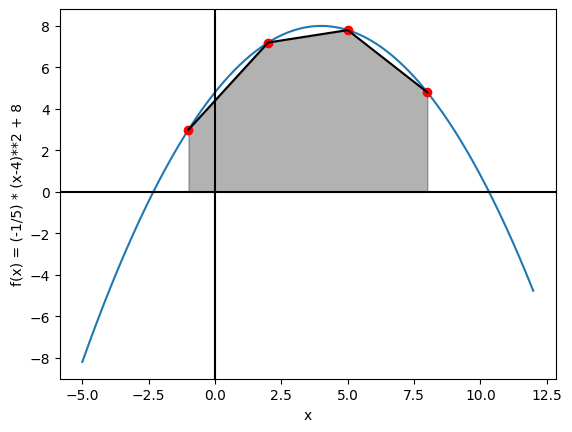

In [ ]:
# Write appropriate code
x = np.arange(-5, 12, 0.01)
y = f(x)

sub_intervals = np.linspace(interval[0], interval[1], 4)

plt.xlabel('x')
plt.ylabel('f(x) = (-1/5) * (x-4)**2 + 8')
plt.plot(x, y)
plt.plot(sub_intervals, f(sub_intervals), 'ro')
plt.plot(sub_intervals, f(sub_intervals), 'k-')
plt.fill_between(sub_intervals, f(sub_intervals), color='k', alpha=0.3)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

#### **C. Simpson's 1/3 Rule**

Simpson's 1/3 rule uses higher-order polynomials to approximate the integral of a function $f(x)$ over the interval $[a,b]$. For Example, if there is an extra point midway between $f(a)$ and $f(b)$, the three points can be connected with a parabola. The area under the parabola is an approximation of the integral of $f(x)$ over the interval $[a,b]$.

<center>
    <img src="../images/simpson.png" width="400" />
</center>

If we are given values of $f(x)$ at 3 points as $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ then we can estimate $f(x)$ using the Lagrange polynomial of degree 2:

$$
\begin{align*}
f(x) &\approx f(x_0) \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
\end{align*}
$$

Now, as the area under the estimated curve is an approximation of the integral of $f(x)$ over the interval $[a,b]$, we can write the integral as:

$$
\begin{align*}
I &= \int_{a}^{b} f(x) dx \\
&\approx \int_{a}^{b} f(x_0) \left[\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} \right] dx
\end{align*}
$$

When $a = x_0$, $b = x_2$, $x_1 = \frac{a+b}{2}$, and $h = \frac{b-a}{2}$, we can simplify the integral to:

$$
\begin{align*}
    I &\approx \frac{h}{3} \left[ f(x_0) + 4f(x_1) + f(x_2) \right] \\
    &= (b-a) \frac{f(x_0) + 4f(x_1) + f(x_2)}{6}
\end{align*}
$$

We will use Simpson's 1/3 rule to approximate the integral of $f(x) = 0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5$ over the interval $[0, 0.8]$. Follow the steps below to approximate the integral using Simpson's 1/3 rule.

##### **Step 1: Define the function**

Define a function `f` that takes a single parameter `x` and returns the value of $f(x) = 0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5$ at `x`. Note that the function should be able to handle both scalar and vector inputs.


In [ ]:
# Write appropriate code
def f(x):
    return 0.2 + 25 * x - 200 * x**2 + 675 * x**3 - 900 * x**4 + 400 * x**5

##### **Step 2: Define the interval**
Define the interval as a numpy array of two elements, where the first element is the lower bound and the second element is the upper bound. Name the array `interval`.

In [ ]:
# Write appropriate code
interval = np.array([0, 0.8])

##### **Step 3: Define a function to approximate the integral using Simpson's 1/3 rule**

Define a function `simpson` that takes a parameter `interval` and returns the approximate value of the integral of $f(x)$ over the interval `interval` using Simpson's 1/3 rule. You have to employ the following steps:

*   Calculate the midpoint of the interval. Store the value in a variable named `midpoint`.
*   Calculate the value of $f(x_0)$, $f(x_1)$, and $f(x_2)$, where $x_0 = a$, $x_1 = \frac{a+b}{2} = midpoint$, and $x_2 = b$. Store the values in variables named `f0`, `f1`, and `f2` respectively.
*   Calculate the approximate value of the integral using Simpson's 1/3 rule. Store the value in a variable named `I`.
*   Return the value of `I`.

In [ ]:
# Write appropriate code
def simpson(interval):
    midpoints = (interval[0] + interval[1]) / 2
    f_a = f(interval[0])
    f_b = f(interval[1])
    f_m = f(midpoints)

    I = (interval[1] - interval[0]) / 6 * (f_a + 4 * f_m + f_b)
    return I

##### **Step 4: Approximate the integral using Simpson's 1/3 rule**

Call the function `simpson` with the interval `interval` as the parameter. Store the value returned by the function in a variable named `I`. Print the value of `I`. Then you should compute the integral analytically and find the absolute relative error between the two values. Print the absolute relative error.

In [ ]:
# Write appropriate code
I_actual = 1.640533
I = simpson(interval)
print(f'The numerical integration result is: {I:.2f}')
print(f"Relative error: {abs(I_actual - I) / I_actual * 100:.2f}%")

The numerical integration result is: 1.37
Relative error: 16.64%
